# STEP 2

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from pathlib import Path

# Define constants (Assume the values are given or you can replace them with actual values)
V_rated_ClassX = 11.4  # example value
R_ClassX = 89.15         # example value
I_rated_ClassX = 0.16  # example value
I_rated_ClassY = 0.14 # example value

# Define the system of equations
def equations(vars):
    R_ClassY, V_rated_ClassY = vars
    
    eq1 = R_ClassY - ((V_rated_ClassX * (1 + 2 * I_rated_ClassX)) / (V_rated_ClassY * (1 + 2 * I_rated_ClassY)))**(2/3) * R_ClassX
    eq2 = V_rated_ClassY - (R_ClassX / R_ClassY)**(2/3) * V_rated_ClassX
    
    return [eq1, eq2]

# Initial guess for the values of R_ClassY and V_rated_ClassY
initial_guess = [50, 100]  # Replace with appropriate guesses

# Solve the system of equations
solution = fsolve(equations, initial_guess)

R_ClassY, V_rated_ClassY = solution

# Print the results
print(f"R_ClassY: {R_ClassY}")
print(f"V_rated_ClassY: {V_rated_ClassY}")

R_ClassY: 92.5034864085741
V_rated_ClassY: 11.122788574414757


In [51]:
TSR_old = 8.0

omega_old_rated = TSR_old*V_rated_ClassX/R_ClassX

TSR_new = omega_old_rated*R_ClassY/V_rated_ClassY

V_tip_old = omega_old_rated*R_ClassX

omega_new_rated = TSR_new*V_rated_ClassY/R_ClassY


V_tip_new = omega_new_rated*R_ClassY


print(f"V_tip_old = {V_tip_old}")
print(f"V_tip_new = {V_tip_new}")



V_tip_old = 91.2
V_tip_new = 94.6305996686703


In [52]:
DTU_10MW_RWT_ae = Path.cwd().parent / "dtu_10mw/data/DTU_10MW_RWT_ae.dat"  # THIS IS ACTUAL DTU
data = np.loadtxt(DTU_10MW_RWT_ae, skiprows=2, usecols=(0, 1, 2))
r_array_old = data[:, 0]
chord_array_old = data[:, 1]
rel_thickness_array_old = data[:, 2]
hub_radius = 2.8

# Scale Ratios
scale_ratio_blade = (R_ClassY-hub_radius) / (R_ClassX-hub_radius)
scale_ratio_rotor = (R_ClassY) / (R_ClassX)
print(f'scale_ratio_blade = {scale_ratio_blade}')
print(f'scale_ratio_rotor = {scale_ratio_rotor}')

# Blade length
r_array_new = r_array_old * (scale_ratio_blade)
print(f'Blade length DTU = {np.max(r_array_old)}')
print(f'Blade length New = {np.max(r_array_new)}') 

# Manually modify chord array
chord_array_new = chord_array_old * (scale_ratio_blade)
chord_array_new[:4] = 5.38 # cylinder
chord_array_new[4] = 5.386 # cylinder
chord_array_new[5] = 5.45 #this is just to smooth the shape of the blade
chord_array_new[6] = 5.52 #this is just to smooth the shape of the blade
chord_array_new[7] = 5.65 #this is just to smooth the shape of the blade
chord_array_new[8] = 5.85 #this is just to smooth the shape of the blade
print(f'Max chord DTU = {np.max(chord_array_old)}')
print(f'Max chord New = {np.max(chord_array_new)}') 

# Calculate thickness
abs_thickness_array_old = chord_array_old * rel_thickness_array_old/100
abs_thickness_array_new = chord_array_new * rel_thickness_array_old/100

scale_ratio_blade = 1.0388359746215876
scale_ratio_rotor = 1.0376162244371745
Blade length DTU = 86.366
Blade length New = 89.72010778416804
Max chord DTU = 6.202
Max chord New = 6.4428607146030865


# My blade

In [53]:
MY_scale_ratio_rotor = 1 + 0.75*(scale_ratio_rotor-1)
MY_R_ClassY = R_ClassX * MY_scale_ratio_rotor
MY_scale_ratio_blade = (MY_R_ClassY-hub_radius) / (R_ClassX-hub_radius)
print(f'MY_scale_ratio_blade = {MY_scale_ratio_blade}')
print(f'MY_scale_ratio_rotor = {MY_scale_ratio_rotor}')

# Blade length
MY_r_array = r_array_old * (MY_scale_ratio_blade)
print(f'MY Blade length = {np.max(MY_r_array)}')
print(f'MY Rotor radius = {MY_R_ClassY}') 

# Manually modify chord array
MY_chord_array_new = chord_array_old * (MY_scale_ratio_blade)
MY_chord_array_new[:4] = 5.38 # cylinder
MY_chord_array_new[4] = 5.386 # cylinder
MY_chord_array_new[5] = 5.45 #this is just to smooth the shape of the blade
MY_chord_array_new[6] = 5.52 #this is just to smooth the shape of the blade
MY_chord_array_new[7] = 5.65 #this is just to smooth the shape of the blade
MY_chord_array_new[8] = 5.85 #this is just to smooth the shape of the blade
print(f'MY Max chord = {np.max(MY_chord_array_new)}') 

# Calculate thickness
MY_abs_thickness_array_new = MY_chord_array_new * rel_thickness_array_old/100


# Extra
MY_V_rated = (R_ClassX / MY_R_ClassY)**(2/3) * V_rated_ClassX
print(f'MY_V_rated = {MY_V_rated}') 

MY_scale_ratio_blade = 1.0291269809661907
MY_scale_ratio_rotor = 1.0282121683278809
MY Blade length = 88.88158083812603
MY Rotor radius = 91.66511480643058
MY Max chord = 6.382645535952315
MY_V_rated = 11.190505161223838


In [54]:
from pathlib import Path 
import scienceplots
import matplotlib

# matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use('science')

# # Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

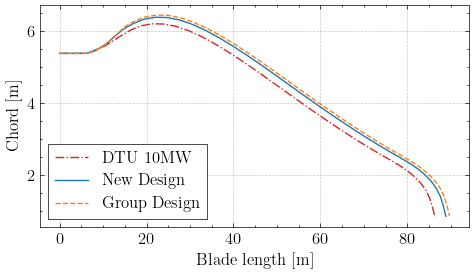

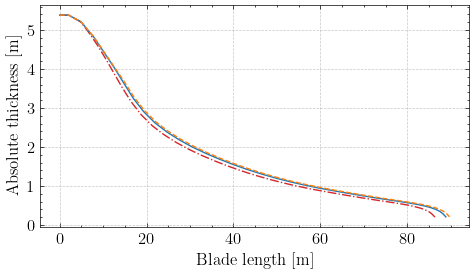

In [56]:
figure = plt.figure(figsize=(5, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.plot(r_array_old, chord_array_old, '-.', label="DTU 10MW", c='tab:red')
plt.plot(MY_r_array, MY_chord_array_new, '-', label="New Design", c='tab:blue')
plt.plot(r_array_new, chord_array_new, '--', label="Group Design", c='tab:orange')
plt.xlabel("Blade length [m]")
plt.ylabel("Chord [m]")
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
legend = plt.legend(fancybox=False, edgecolor="black", loc='lower left')
legend.get_frame().set_linewidth(0.5)
plt.tight_layout()
figure.savefig("plots/Chord.pdf", dpi = 300, bbox_inches = 'tight')

figure = plt.figure(figsize=(5, 3))
plt.plot(r_array_old, abs_thickness_array_old, '-.', label="DTU 10MW", c='tab:red')
plt.plot(MY_r_array, MY_abs_thickness_array_new, '-', label="New Design", c='tab:blue')
plt.plot(r_array_new, abs_thickness_array_new, '--', label="Group Design", c='tab:orange')
plt.xlabel("Blade length [m]")
plt.ylabel("Absolute thickness [m]")
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
figure.savefig("plots/Absolute_thickness.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()